#Intro
1. Weather data analysis
2. Predict the weather with 8 parameters: (input)
      
        Date-Time
        Temperature (C)
        Apparent Temperature (C)
        Humidity
        Wind Speed (km/h)
        Wind Bearing (degrees)
        Visibility (km)
        Pressure (millibars)
  
  27 classes of weather: (output)

        Breezy
        Breezy and Dry
        Breezy and Foggy
        Breezy and Mostly Cloudy
        Breezy and Overcast
        Breezy and Partly Cloudy
        Clear
        Dangerously Windy and Partly Cloudy
        Drizzle
        Dry
        Dry and Mostly Cloudy
        Dry and Partly Cloudy
        Foggy
        Humid and Mostly Cloudy
        Humid and Overcast
        Humid and Partly Cloudy
        Light Rain
        Mostly Cloudy
        Overcast
        Partly Cloudy
        Rain
        Windy
        Windy and Dry
        Windy and Foggy
        Windy and Mostly Cloudy
        Windy and Overcast
        Windy and Partly Cloudy
  
  Dataset link: https://www.kaggle.com/datasets/muthuj7/weather-dataset/code

# Setup

In [151]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split


Import from google drive

In [152]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive')
data_csv = pd.read_csv("weatherHistory.csv")



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Data Processing
The model will try to predict the features (the list classes[ ] below) with the parameters provided (the list para[ ] below)

There are 27 classes in total

In [153]:
# para = ['precipitation', 'temp_max','temp_min','wind']
para = [	'Temperature (C)',	'Apparent Temperature (C)',	'Humidity',	'Wind Speed (km/h)',	'Wind Bearing (degrees)',	'Visibility (km)',	'Pressure (millibars)']

classes = ['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
       'Breezy and Mostly Cloudy', 'Breezy and Overcast',
       'Breezy and Partly Cloudy', 'Clear',
       'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry',
       'Dry and Mostly Cloudy', 'Dry and Partly Cloudy', 'Foggy',
       'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
       'Overcast', 'Partly Cloudy', 'Rain', 'Windy', 'Windy and Dry',
       'Windy and Foggy', 'Windy and Mostly Cloudy', 'Windy and Overcast',
       'Windy and Partly Cloudy']

df = data_csv

# These two parameters have little impact on prediction, so just throw them away
df.drop(['Daily Summary','Loud Cover'],axis=1,inplace=True)

# Drop out unknown data
df.dropna(inplace=True)

for i in para:
  df[i] = df[i] / df[i].max()

# weather_dic = {'drizzle':0, 'sun':1,'rain':2,'fog':3,'snow':4}

# Y = []
# for i in df['weather']:
#   Y.append(weather_dic[i])


Use labelEncoder to transform the text data to numerical data

In [154]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Precip Type']=le.fit_transform(df['Precip Type'])
df['Summary']=le.fit_transform(df['Summary'])


Standarize input features

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns[2:]] = scaler.fit_transform(df[df.columns[2:]])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,19,-0.354531,-0.257951,-0.324102,0.792748,0.478964,0.591157,1.309107,0.102152
1,2006-04-01 01:00:00.000 +0200,19,-0.354531,-0.270141,-0.339134,0.639470,0.499902,0.665655,1.309107,0.106415
2,2006-04-01 02:00:00.000 +0200,17,-0.354531,-0.267819,-0.138532,0.792748,-0.993620,0.153478,1.100806,0.109058
3,2006-04-01 03:00:00.000 +0200,19,-0.354531,-0.381594,-0.458873,0.486192,0.476638,0.758778,1.309107,0.113066
4,2006-04-01 04:00:00.000 +0200,17,-0.354531,-0.332833,-0.362460,0.486192,0.034630,0.665655,1.309107,0.113919


# Explore the data

Import csv

In [156]:
df0 = pd.read_csv("weatherHistory.csv")
df0[["Date-Time","TZ"]]=df0["Formatted Date"].str.split("+",expand=True)
df1=df0.drop(columns="Formatted Date")

In [157]:
columns_order=["Date-Time","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"]
df2=df1.reindex(columns=columns_order)
df3=df2

Process the time

In [158]:
df3["Date-Time"]=pd.to_datetime(df3["Date-Time"])
df3["Year"]=pd.DatetimeIndex(df3["Date-Time"]).year
df3["Month"]=df3["Date-Time"].dt.month_name()
df3["day"]=df3["Date-Time"].dt.day
df3["hour"]=df3["Date-Time"].dt.hour
df3.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,day,hour
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,April,1,0
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,April,1,1
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,April,1,2
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,April,1,3
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,April,1,4


A method to treat time data from other developers

In [159]:
from datetime import datetime

def discretize_date(current_date, t):
    cdate = datetime.strptime(str(current_date), '%Y-%m-%d %H:%M:%S')

    if t == 'hour_sin':
        return np.sin(2 * np.pi * cdate.hour/24.0)
    if t == 'hour_cos':
        return np.cos(2 * np.pi * cdate.hour/24.0)
    if t == 'day_sin':
        return np.sin(2 * np.pi * cdate.timetuple().tm_yday/365.0)
    if t == 'day_cos':
        return np.cos(2 * np.pi * cdate.timetuple().tm_yday/365.0)

In [160]:
date_types = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos']
for dt in date_types:
    df3[dt] = df3["Date-Time"].apply(lambda x : discretize_date(x, dt))


#Correlational study

Extract numerical data

In [161]:
data = pd.read_csv("weatherHistory.csv")
data.drop(['Daily Summary'],axis=1,inplace=True)

Y = data.iloc[:,1] 
X = data.iloc[:,3:] 

<Figure size 504x360 with 0 Axes>

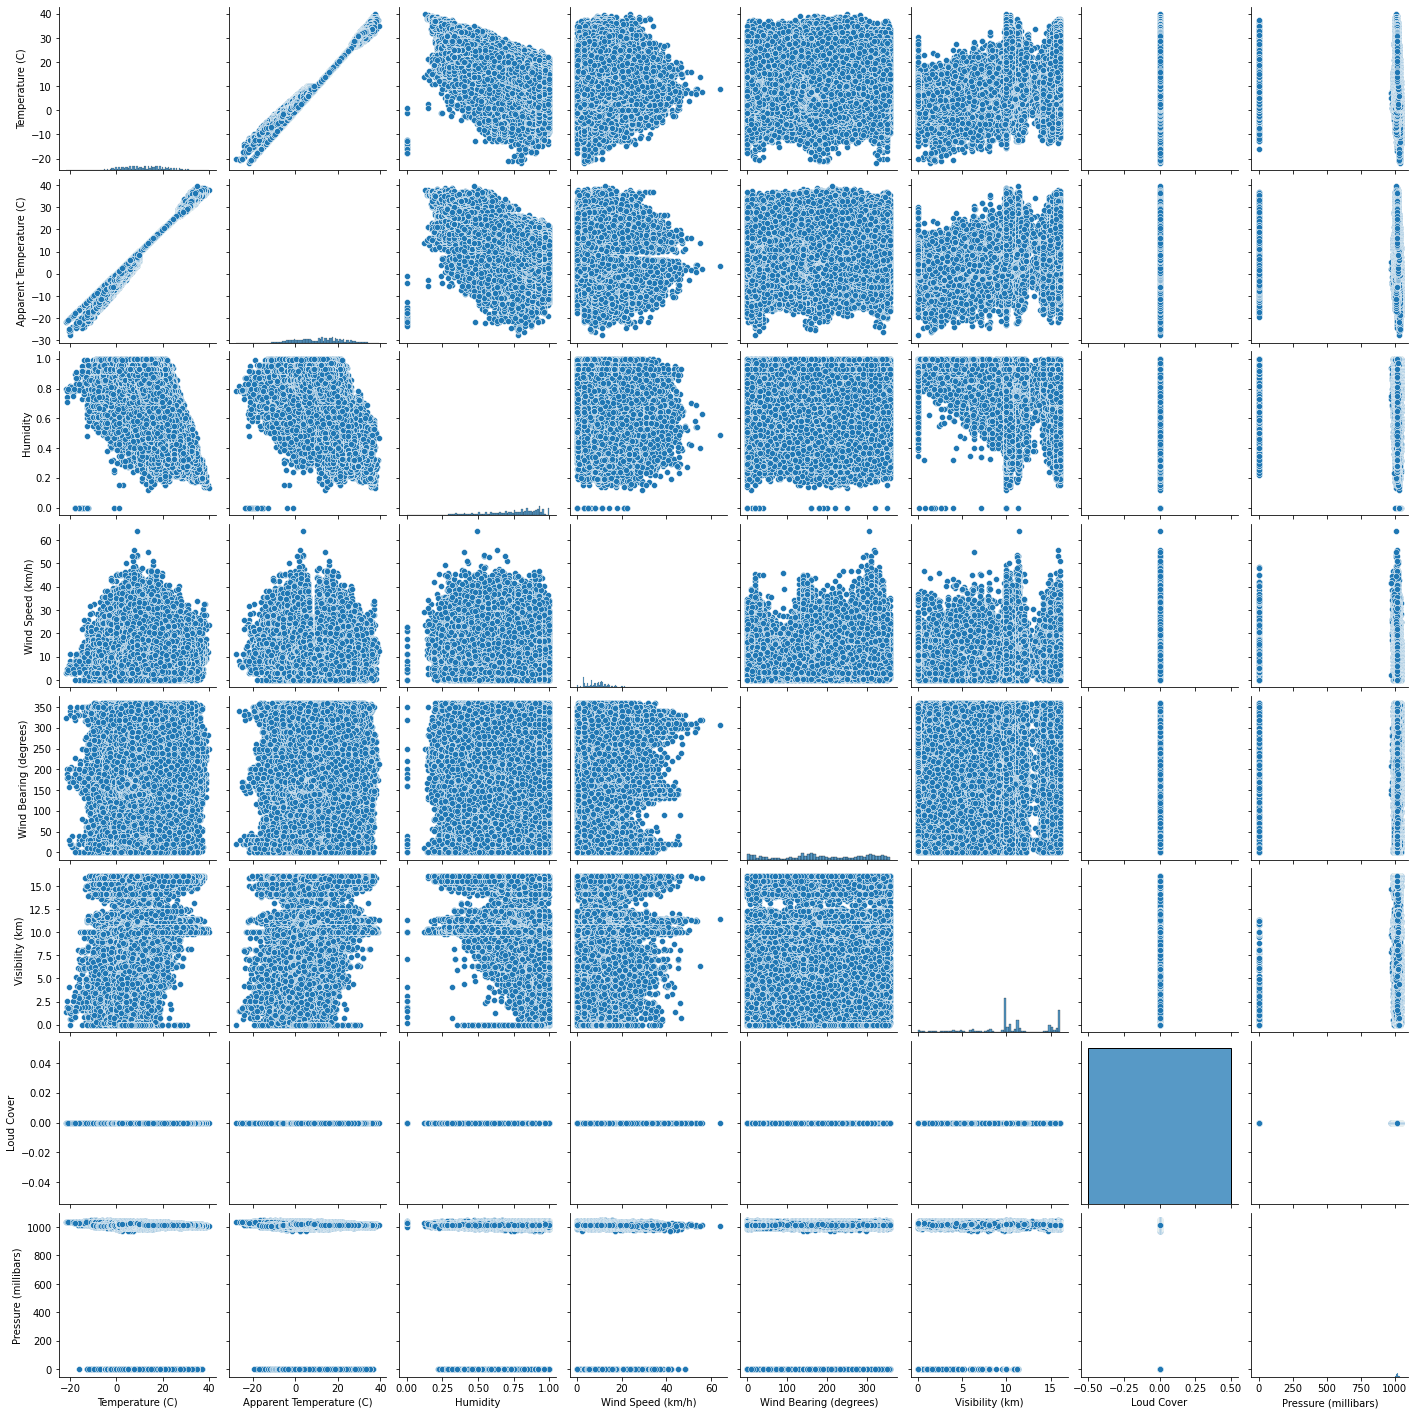

In [162]:
plt.figure(figsize=(7,5))
sns.pairplot(X)

From the plot above, temperature and apparent temperature seem to be highly correlate with each other. Loud cover has no correlation with other parameters.

The pairwise correlation coefficient is shown below.

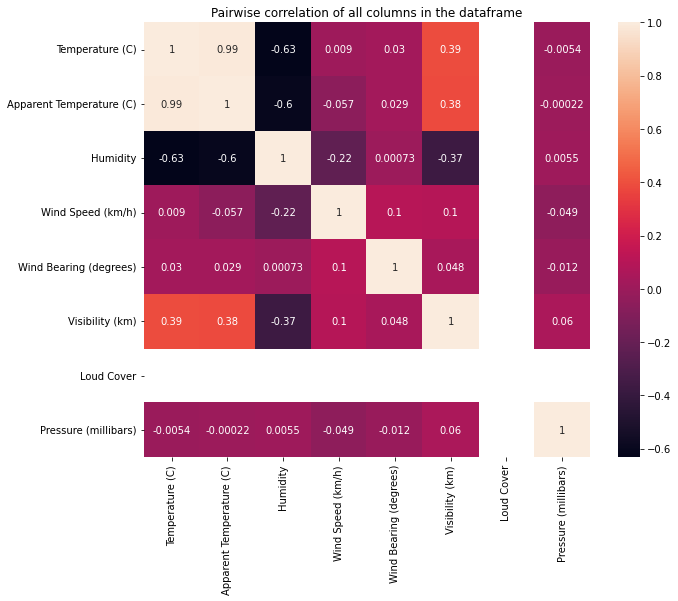

In [163]:
plt.figure(figsize=(10,8))
sns.heatmap(data= X.corr(), annot=True)
plt.title("Pairwise correlation of all columns in the dataframe")
plt.show()

# Add processed time to training dataset

In [164]:
types = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos']
for dt in types:
      df[dt] = df3[dt]

df.drop(['Formatted Date'],axis=1,inplace=True)

df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour_sin,hour_cos,day_sin,day_cos
0,19,-0.354531,-0.257951,-0.324102,0.792748,0.478964,0.591157,1.309107,0.102152,0.000000,1.000000,0.999991,0.004304
1,19,-0.354531,-0.270141,-0.339134,0.639470,0.499902,0.665655,1.309107,0.106415,0.258819,0.965926,0.999991,0.004304
2,17,-0.354531,-0.267819,-0.138532,0.792748,-0.993620,0.153478,1.100806,0.109058,0.500000,0.866025,0.999991,0.004304
3,19,-0.354531,-0.381594,-0.458873,0.486192,0.476638,0.758778,1.309107,0.113066,0.707107,0.707107,0.999991,0.004304
4,17,-0.354531,-0.332833,-0.362460,0.486192,0.034630,0.665655,1.309107,0.113919,0.866025,0.500000,0.999991,0.004304


# Split data for train and test

In [165]:
Y = df.iloc[:,0] 
X = df.iloc[:,1:] 

x_train = []
x_test = []
y_train = []
y_test = []
y_train_onehot = []
y_test_onehot = []
while True:
  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1, random_state = 1)
  y_train_onehot = tf.keras.utils.to_categorical(y_train)
  y_test_onehot = tf.keras.utils.to_categorical(y_test)
  if len(y_train_onehot[0]) is 27 & len(y_test_onehot[0]) is 27:
      break

# Build Model

In [166]:
def build_model_sequential(denseList, inputShape):
  model = tf.keras.models.Sequential()
  if len(denseList) is 1:
    model.add(tf.keras.layers.Dense(denseList[0], activation='softmax',input_shape=inputShape)) 
  else:
    model.add(tf.keras.layers.Dense(denseList[0], activation='relu',input_shape=inputShape)) 
    for i in denseList[1:-1]:
        model.add(tf.keras.layers.Dense(i, activation='relu')) 
    model.add(tf.keras.layers.Dense(denseList[-1], activation='softmax')) 

  model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
  return model




# Model 1
Single-layer: linear regression

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   

 dense (Dense)               (None, 27)                351       
                                                                 

Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________

epochs:50 - loss: 0.0290 - accuracy: 0.4030
[0.02904602326452732, 0.4029601812362671]


In [167]:
# model_lr = tf.keras.models.Sequential()
# model_lr.add(tf.keras.layers.Dense(27, activation='softmax',input_shape=(8))) # 27 classes, so cannot change
denselist = [27]
inputShape = (12,)
lr_model = build_model_sequential(denselist,inputShape)

In [168]:
# compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [169]:
lr_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 27)                351       
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [170]:
history = lr_model.fit(
    x_train,
    y_train_onehot,
    validation_split=0.2,
    epochs=50
    )

Epoch 1/50
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0364 - accuracy: 0.0150 - val_loss: 0.0364 - val_accuracy: 0.0145
Epoch 2/50
2159/2159 [==============================] - 3s 1ms/step - loss: 0.0363 - accuracy: 0.0170 - val_loss: 0.0363 - val_accuracy: 0.0168
Epoch 3/50
2159/2159 [==============================] - 3s 2ms/step - loss: 0.0362 - accuracy: 0.0197 - val_loss: 0.0362 - val_accuracy: 0.0198
Epoch 4/50
2159/2159 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.0229 - val_loss: 0.0361 - val_accuracy: 0.0244
Epoch 5/50
2159/2159 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.0273 - val_loss: 0.0360 - val_accuracy: 0.0286
Epoch 6/50
2159/2159 [==============================] - 3s 2ms/step - loss: 0.0359 - accuracy: 0.0336 - val_loss: 0.0359 - val_accuracy: 0.0359
Epoch 7/50
2159/2159 [==============================] - 3s 2ms/step - loss: 0.0358 - accuracy: 0.0412 - val_loss: 0.0358 - val_accuracy:

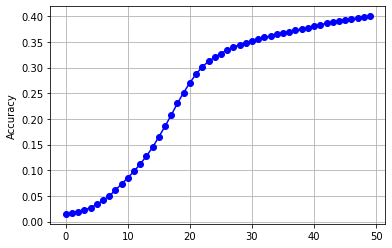

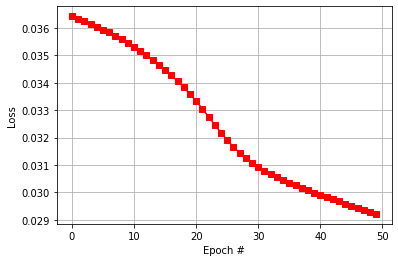

In [171]:
plt.figure(1)
plt.plot(history.history['accuracy'], 'b-o')
plt.grid(True)
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(history.history['loss'],'r-s')
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.show()

In [172]:
lr_model.evaluate(x_test, y_test_onehot)

300/300 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.4030


[0.02904602326452732, 0.4029601812362671]

# Model 2
Multi-layer ANN

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   

 dense_5 (Dense)             (None, 128)               1664      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 27)                1755      
                                                                 

Total params: 11,675
Trainable params: 11,675
Non-trainable params: 0
_________________________________________________________________

epochs: 20 - loss: 0.0239 - accuracy: 0.4802
[0.023916197940707207, 0.4801959693431854]


In [173]:
denselist = [128, 64, 27]
inputShape = (12,)
lg_model = build_model_sequential(denselist,inputShape)

In [174]:
# lg_model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [175]:
lg_model.build(input_shape=(None, 8))

lg_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1664      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 27)                1755      
                                                                 
Total params: 11,675
Trainable params: 11,675
Non-trainable params: 0
_________________________________________________________________


In [176]:
history = lg_model.fit(
    x_train,
    y_train_onehot,
    validation_split=0.2,
    epochs=50
    )

Epoch 1/50
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.0037 - val_loss: 0.0359 - val_accuracy: 0.0066
Epoch 2/50
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.0087 - val_loss: 0.0357 - val_accuracy: 0.0125
Epoch 3/50
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.0167 - val_loss: 0.0356 - val_accuracy: 0.0226
Epoch 4/50
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0355 - accuracy: 0.0329 - val_loss: 0.0354 - val_accuracy: 0.0477
Epoch 5/50
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.0702 - val_loss: 0.0352 - val_accuracy: 0.0982
Epoch 6/50
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.1366 - val_loss: 0.0350 - val_accuracy: 0.1755
Epoch 7/50
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0349 - accuracy: 0.2212 - val_loss: 0.0348 - val_accuracy:

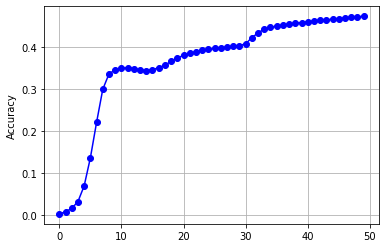

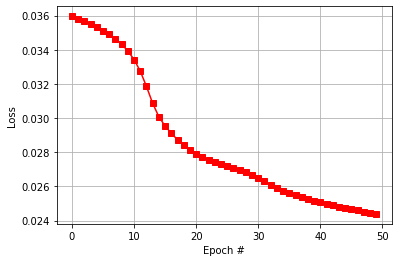

In [177]:
plt.figure(1)
plt.plot(history.history['accuracy'], 'b-o')
plt.grid(True)
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(history.history['loss'],'r-s')
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.show()

In [ ]:
lg_model.evaluate(x_test, y_test_onehot)

#Model 3
Random Forest

(just copy & paste from other developers)

Accuracy: 0.6841776110068793

In [179]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)

In [180]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6841776110068793


# Define plotting function to plot variables over years, months or hours

In [181]:
def plot_avg_year(col):
  year=pd.DataFrame(df3.groupby("Year")[col].mean())

  # plot the data
  fig,ax=plt.subplots(figsize=(12,4))
  sns.lineplot(x=year.index,y=year[col])
  plt.title("Average "+ col + " over the years")


def plot_avg_month(col):
  month=pd.DataFrame(df3.groupby("Month")[col].mean())
  order=["January","February","March","April","May","June","July","August","September","October","November","December"]
  month_reindexed=month.reindex(index=order)

  # plot the data
  fig,ax=plt.subplots(figsize=(12,4))
  sns.lineplot(x=month_reindexed.index,y=month_reindexed[col])
  plt.title("Average "+ col + " over the months")

def plot_avg_hour(col):
  hour=pd.DataFrame(df3.groupby("hour")[col].mean())

  # plot the data
  fig,ax=plt.subplots(figsize=(12,4))
  sns.lineplot(x=hour.index,y=hour[col])
  plt.title("Average "+ col + " over the hours")

#Temperature over years, months or hours

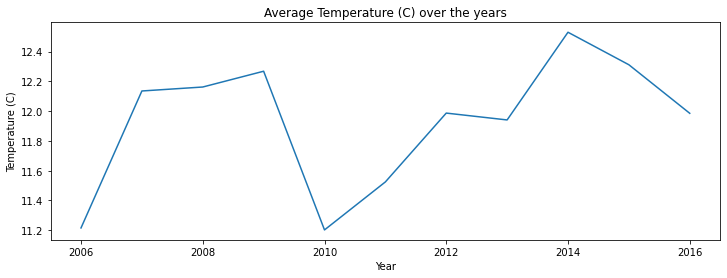

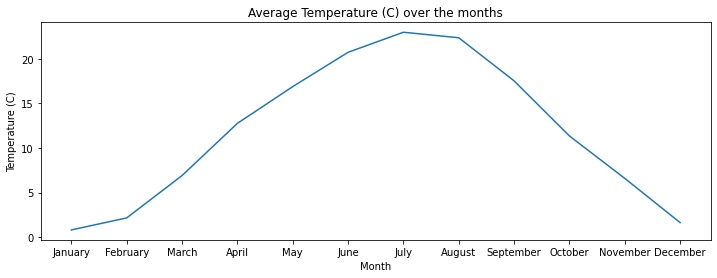

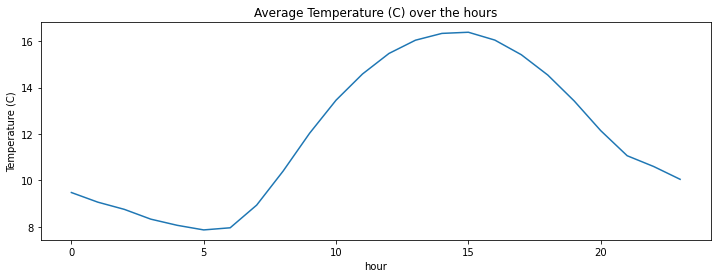

In [184]:
val = "Temperature (C)"
plot_avg_year(val)
plot_avg_month(val)
plot_avg_hour(val)

# Wind speed over years, months or hours

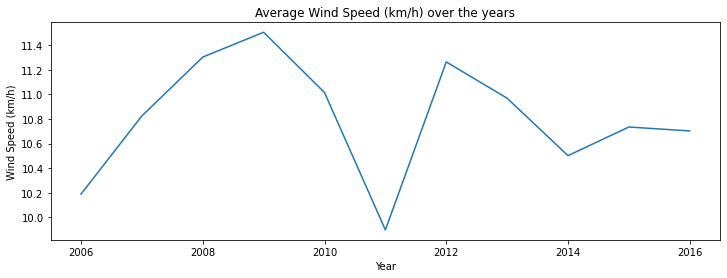

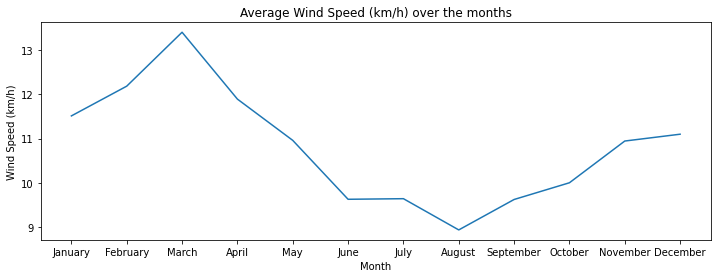

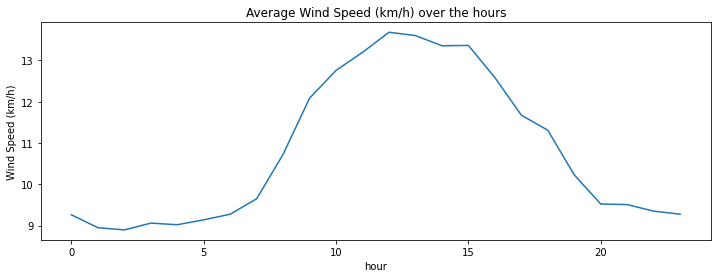

In [185]:
val = "Wind Speed (km/h)"
plot_avg_year(val)
plot_avg_month(val)
plot_avg_hour(val)




# Humidity over years, months or hours

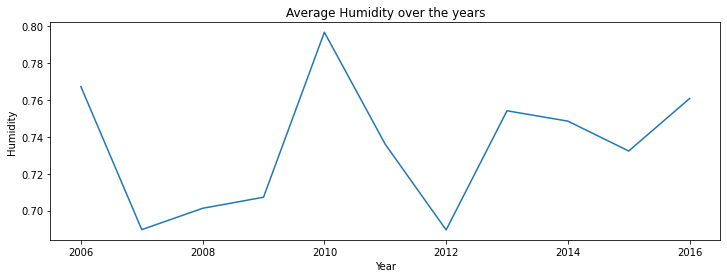

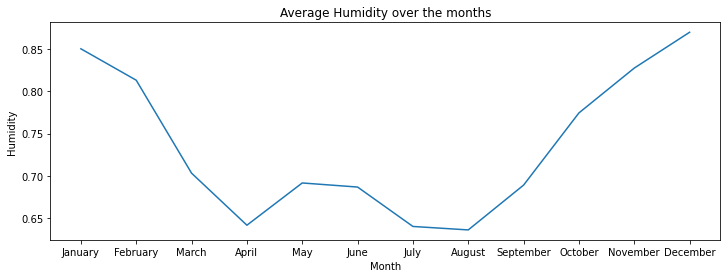

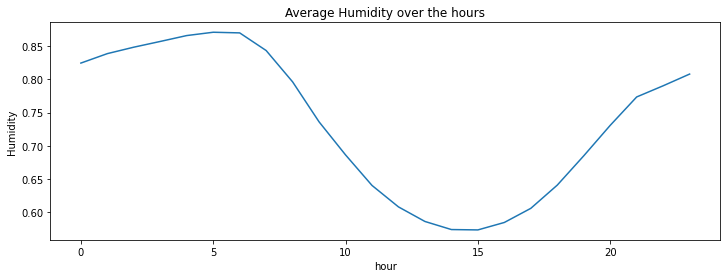

In [186]:
val = "Humidity"
plot_avg_year(val)
plot_avg_month(val)
plot_avg_hour(val)




# Wind Bearing over years, months or hours

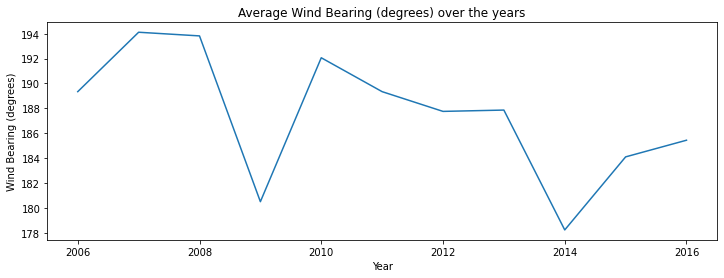

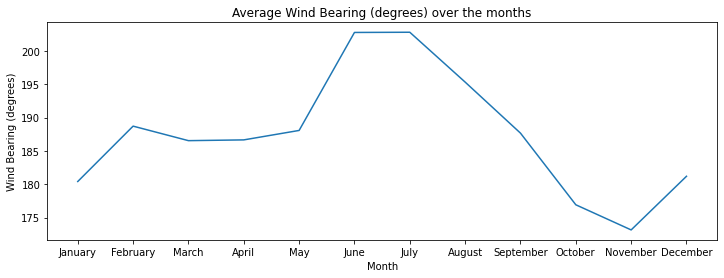

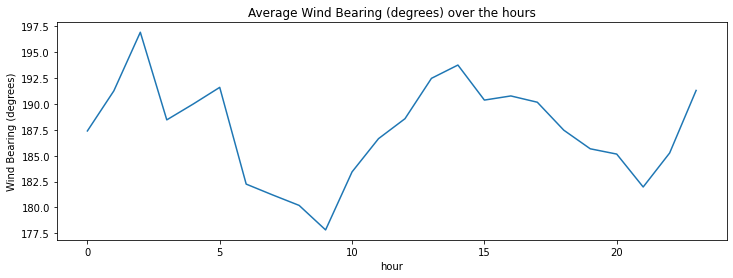

In [187]:
val = "Wind Bearing (degrees)"
plot_avg_year(val)
plot_avg_month(val)
plot_avg_hour(val)


#Visibility over years, months or hours

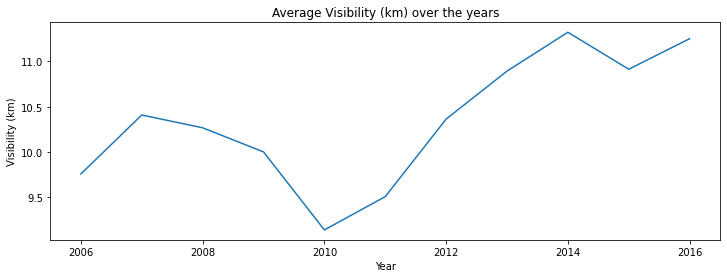

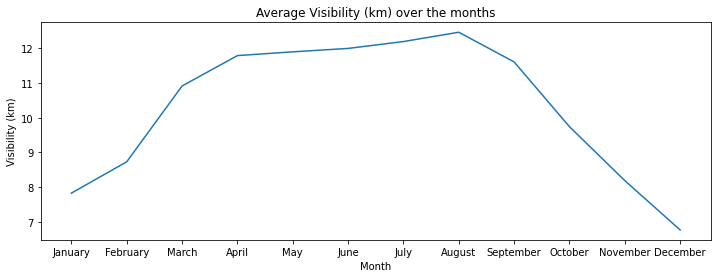

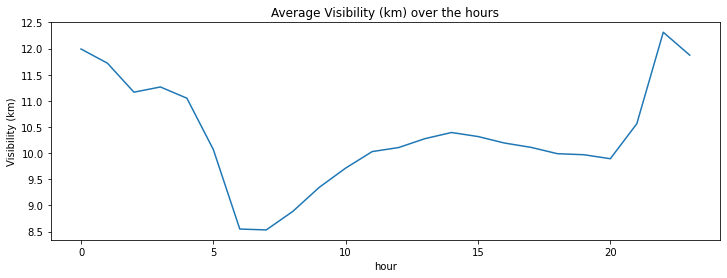

In [188]:
val = "Visibility (km)"
plot_avg_year(val)
plot_avg_month(val)
plot_avg_hour(val)
